# GWTC-4.0 Parameter Estimation

GWTC-4.0 is the "fourth gravitational wave transient catalog" from the [LIGO](https://www.ligo.org/) Scientific Collaboration, [Virgo](https://www.virgo-gw.eu/) Collaboration, and [KAGRA](https://gwcenter.icrr.u-tokyo.ac.jp/en/) Collaboration (LVK).
GWTC-4.0 updates the first catalogs ([GWTC-1.0](https://www.ligo.org/science/Publication-O2Catalog/), [GWTC-2.0](https://ligo.org/science/Publication-O3aCatalog/), [GWTC-2.1](https://ligo.org/science/Publication-O3aFinalCatalog/), and [GWTC-3.0](https://www.ligo.org/science/Publication-O3bCatalog/)) with merger events observed during the first part of Observing Run 4 (O4a), which was from May 24, 2023 to January 16, 2024. 

The events listed in GWTC-4.0 are binary mergers between [black holes](https://en.wikipedia.org/wiki/Black_hole) and [neutron stars](https://en.wikipedia.org/wiki/neutron_star). 
Both black holes and neutron stars are classified as [compact objects](https://en.wikipedia.org/wiki/Compact_star). 
The LVK detectors are sensitive to three different types of compact binary mergers:

- Binary black hole (BBH) merger
- Binary neutron star (BNS) merger
- Neutron star - black hole (NSBH) merger

This notebook is part of the GWTC-4.0 data release. 
It shows you how to read and plot parameter estimation results from [the parameter estimation data release](https://doi.org/10.5281/zenodo.16053484).

For more information see:
- the GWTC-4.0 page on GWOSC (Gravitational Wave Open Science Center) [www.gw-openscience.org/GWTC-4.0/ ](https://www.gw-openscience.org/GWTC-4.0/) 
- a free preprint of the GWTC-4.0 results paper [dcc.ligo.org/LIGO-P2400386/public](https://dcc.ligo.org/LIGO-P2400386/public)


## Description of files

This notebook accompanies the [the parameter estimation data release](https://doi.org/10.5281/zenodo.16053484) associated with GWTC-4.0. 
The data is available as a single HDF5 file that contains summary information from all parameter estimation runs as well as an HDF5 file per event that contains all parameter estimation data for analyses of that event.
This data release also includes a compressed file, `IGWN-GWTC4-ecfbac9a4_720-Archived_Skymaps.tar.gz`, that includes the skymap files for every parameter estimation run.
This notebook shows you how to read and plot these parameter estimation results. 

### Naming conventions & files

All files are named using the following naming convention:

`IWGN-{Catalog}-{version_hash}-{GW_name}-{File_Description}.{File_Extension}`

* `Catalog`: This is the name of the catalog this file is released as a part of. All files in this release have this field equal to `GWTC4p0`
* `version_hash`: This is a hash used to indicate the version of the file that is being released and to ensure that all released versions will have a unique name. All files in this release have this field equal to `0f954158d_720`
* `GW_name`: The name of the GW candidate whose data is contained in the file of interest. Candidates are named based on the time the event was observed by the LVK network, using the year, month, day, hour, minute, and second in the format `GW[YY][MM][DD]_[hh][mm][ss]`. If a file is not about a specific candidate, then this field is omitted. 
* `File_Description`: A short description of the type of contents of the file. 
* `File_Extension`: The file extension, indicating the format of the file. 

The search result summary table file which includes information about all candidates (and hence omits the `GW_name` file) is named:

* `IGWN-GWTC4p0-0f954158d_720-PESummaryTable.hdf5`

For example, a file with results for a specific candidate might be called: 

* `IGWN-GWTC4p0-0f954158d_720-GW231226_101520-combined_PEDataRelease.hdf5`

This file contains the posterior samples for every analysis of `GW231226_101520`.

For every parameter estimation analysis, there is a single skymap file. For example, the skymap file for the analysis of `GW231226_101520` with the `IMRPhenomXPHM_SpinTaylor` waveform is named:

* `IGWN-GWTC4p0-0f954158d_720-GW231226_101520-IMRPhenomXPHM_SpinTaylor_Skymap_PEDataRelease.fits.gz`



## Hold on! What is parameter estimation?

After detecting a gravitational wave signal, we would like to learn about what kind of compact object produced the signal. We can then answer questions like:

- What type of source was it likely to be? BBH, BNS, NSBH or MassGap.
- How massive were the black holes or neutron stars that collided? 
- Which direction on the sky did the signal come from?

The properties (or parameters) of the merging objects decide the shape of the gravitational waveform signal. 
Parameter estimation is a detailed analysis of the [shape of the signal waveform](https://www.ligo.org/magazine/LIGO-magazine-issue-8-extended.pdf#page=6). We compare many possible waveforms to the observed signal and find credible ranges for the parameters of the source. 


There are two types of parameters that describe a gravitational wave signal. 

- **Intrinsic** parameters are properties of the binary itself, including the masses and spins of the compact objects. 
- **Extrinsic** parameters are properties which describe how we view the merger from the Earth. This includes the position of the source in the sky, the distance to the source, and its orientation. 

More information on parameter estimation can be found in the [GWOSC Open Data Workshop](https://www.gw-openscience.org/static/workshop4/index.html).

The result of parameter estimation analysis is a list of posterior samples for each parameter. 
The samples represents the posterior distribution of the parameter, which tells us the most credible values of the signal parameters. 
This notebook shows you how to read and plot parameter estimation samples as a starting point for use in your own analysis. 

## Notebook Setup

In [1]:
# uncomment the line below and point it to the 
# location of the extracted data on your computer
# pathToData = 'path/to/the/search_data/'
pathToData = './parameter_estimation/'

Here we change the settings for the notebook to improve readability. The next cell replaces the Python `print()` function with Ipython's own display function. This improves representations of long lists

In [2]:
from IPython.display import display as print

We now need to install any packages that we intend to use in this notebook.
__NOTE:__ This command may change some settings in your notebook. If you find that aspects of the notebook are no longer working correctly, or cells are erroring, then please restart the kernel and run the notebook without this cell. All packages will remain installed and the settings will revert back

In [3]:
# This command allows you to run `pip install <package>` within a Jupyter Notebook
import sys
#!{sys.executable} -m pip install --quiet "gwosc" "gwpy" "matplotlib" "numpy<=1.23" "pycbc" "ligo.skymap" "pesummary>=0.13.2" "pepredicates" "p_astro"

If you prefer conda to pip then please run:

In [4]:
#conda install --yes --prefix {sys.prefix} gwosc gwpy matplotlib pycbc numpy<=1.23 ligo.skymap pesummary>=0.13.2 pepredicates p_astro

Now let's import some useful modules including [matplotlib](https://matplotlib.org/) and [pesummary](https://docs.ligo.org/lscsoft/pesummary/stable_docs/gw/index.html#the-pesummary-metafile)

In [5]:
import matplotlib.pyplot as plt
import pesummary
from pesummary.io import read
import h5py
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

## This notebook - the parameter estimation data release

In this notebook we include examples of how you can:
- Read the parameter estimation summary table
- Access and download the parameter estimation posterior data
- Read in parameter estimation posterior data
- Plot the posterior distributions
- Compare the results of different parameter estimation runs
- Show the waveforms of the maximum likelihood samples
- Study the noise of the detector
- Investigate the location of the detector in the sky
- Examine the waveform of a signal

## Reading the summary table file

The summary table file is a single HDF5 file that contains a summary information about all of the GWTC-4.0 parameter estimation results.

Here, we show how to read the search summary file using [gwpy](https://gwpy.github.io/docs/stable/table/io.html), which extends the Astropy Table object functionality with additional features. 
This file can also be read using [Astropy](https://docs.astropy.org/en/latest/table/index.html) directly. 

Import `gwpy.table` to read in the HDF5 file tables:

In [6]:
from gwpy.table import EventTable

In [7]:
Summary_Path = pathToData+'IGWN-GWTC4p0-0f954158d_720-PESummaryTable.hdf5'

We read the trigger file using `EventTable.read`. 
Since there is only a single table in this file, no additional arguments are needed.

In [8]:
Summary_Table = EventTable.read(Summary_Path)

We can see what datafields are available using `colnames`:

In [9]:
Summary_Table.colnames

['result_label',
 'gw_name',
 'result_file_name',
 'result_samples_key',
 'superevent_id',
 'total_mass_source_median',
 'total_mass_source_lower',
 'total_mass_source_upper',
 'chirp_mass_source_median',
 'chirp_mass_source_lower',
 'chirp_mass_source_upper',
 'mass_1_source_median',
 'mass_1_source_lower',
 'mass_1_source_upper',
 'mass_2_source_median',
 'mass_2_source_lower',
 'mass_2_source_upper',
 'final_mass_source_median',
 'final_mass_source_median.mask',
 'final_mass_source_lower',
 'final_mass_source_lower.mask',
 'final_mass_source_upper',
 'final_mass_source_upper.mask',
 'chi_eff_median',
 'chi_eff_lower',
 'chi_eff_upper',
 'final_spin_median',
 'final_spin_median.mask',
 'final_spin_lower',
 'final_spin_lower.mask',
 'final_spin_upper',
 'final_spin_upper.mask',
 'luminosity_distance_median',
 'luminosity_distance_lower',
 'luminosity_distance_upper',
 'redshift_median',
 'redshift_lower',
 'redshift_upper',
 'network_matched_filter_snr_median',
 'network_matched_filte

A few columns of interest are:

* `result_label`: A unique label for each parameter estimation analysis, given by `{gw_name}-{result_samples_key}`
* `gw_name`: The GW name of the candidate described in each row.
* `result_file_name`: The name of the HDF5 file that contains the full posterior for this parameter estimation analysis
* `result_samples_key`: The corresponding key used to access this parameter estimation analysis inside the relevant HDF5 file
* `superevent_id`: The ID of the superevent on https://gracedb.ligo.org that is associated with this candidate

There are also many columns that have similar names. These indicate the median and 90 percent credible intervals for a given parameter. For example, let's look at the `chirp_mass_source` parameter.
* `chirp_mass_source_median`: The 50th percentile (median) value of the `chirp_mass_source` posterior
* `chirp_mass_source_lower`: The 5th percentile value of the `chirp_mass_source` posterior
* `chirp_mass_source_upper`: The 95th percentile value of the `chirp_mass_source` posterior

We now can check how many PE runs are in this table, and then display the entire table. 

In [10]:
len(Summary_Table)

369

In [11]:
Summary_Table

result_label,gw_name,result_file_name,result_samples_key,superevent_id,total_mass_source_median,total_mass_source_lower,total_mass_source_upper,chirp_mass_source_median,chirp_mass_source_lower,chirp_mass_source_upper,mass_1_source_median,mass_1_source_lower,mass_1_source_upper,mass_2_source_median,mass_2_source_lower,mass_2_source_upper,final_mass_source_median,final_mass_source_median.mask,final_mass_source_lower,final_mass_source_lower.mask,final_mass_source_upper,final_mass_source_upper.mask,chi_eff_median,chi_eff_lower,chi_eff_upper,final_spin_median,final_spin_median.mask,final_spin_lower,final_spin_lower.mask,final_spin_upper,final_spin_upper.mask,luminosity_distance_median,luminosity_distance_lower,luminosity_distance_upper,redshift_median,redshift_lower,redshift_upper,network_matched_filter_snr_median,network_matched_filter_snr_lower,network_matched_filter_snr_upper,skymap_result_file_name
bytes55,bytes15,bytes70,bytes39,bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bool,float64,bool,float64,float64,float64,float64,bool,float64,bool,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes107
GW230518_125908-C00:IMRPhenomNSBH:LowSpin,GW230518_125908,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-combined_PEDataRelease.hdf5,C00:IMRPhenomNSBH:LowSpin,S230518h,9.561463710446187,1.3161485466722507,1.1643025993880691,2.7899692613489466,0.06344118776082786,0.06276877075385556,8.122719480628593,1.5767051386814703,1.304117548709053,1.444823633592922,0.1481325166497638,0.2609005788356702,9.412541103291073,False,1.3355768694497918,False,1.1750227406298137,False,-0.005905906140873805,0.17633199455046433,0.11316659914738324,0.3821704230966011,False,0.021358289466098246,False,0.031217112661908075,False,253.01897083511824,108.59060513958161,118.8260889125545,0.05502094335806712,0.02308575497914593,0.024470607153955326,13.972494121200306,0.3542647510057755,0.20128608222800892,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-IMRPhenomNSBH:LowSpin_Skymap_PEDataRelease.fits.gz
GW230518_125908-C00:IMRPhenomPv2-NRTidalv2:LowSpin,GW230518_125908,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-combined_PEDataRelease.hdf5,C00:IMRPhenomPv2-NRTidalv2:LowSpin,S230518h,9.449347220210713,2.422271903479568,1.093618455644247,2.7878984375640643,0.06267496131544448,0.05550492891388581,7.991366302468091,3.116593837827428,1.2331118402943169,1.4633728375756008,0.1510819379269004,0.6937860458558254,nan,True,nan,True,nan,True,-0.02014699590256967,0.39332356927612455,0.105856633454439,nan,True,nan,True,nan,True,253.71565140867156,94.64449373003751,117.70613261631146,0.0551667301716766,0.020075082825360163,0.024239005784395293,13.921802853512215,0.3642540197615709,0.22153924994551133,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-IMRPhenomPv2_NRTidalv2:LowSpin_Skymap_PEDataRelease.fits.gz
GW230518_125908-C00:IMRPhenomXPHM-SpinTaylor,GW230518_125908,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-combined_PEDataRelease.hdf5,C00:IMRPhenomXPHM-SpinTaylor,S230518h,9.620545152354259,0.8054107517023645,0.7387107632004053,2.7985125364877783,0.05780506813829733,0.056316123194483314,8.176078996270382,0.9399490887942719,0.8295979391556063,1.4468049040748239,0.10605095828560107,0.1378047704178076,nan,True,nan,True,nan,True,-0.012408506701723264,0.11319238960448368,0.08903824658202553,nan,True,nan,True,nan,True,236.7211154412265,97.88774009673696,107.57292089159526,0.05160229986474156,0.02087692606207253,0.022284032915514132,14.321671337193617,0.3815762183190827,0.2400690717091809,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-IMRPhenomXPHM_SpinTaylor_Skymap_PEDataRelease.fits.gz
GW230518_125908-C00:SEOBNRv4_ROM_NRTidalv2_NSBH:LowSpin,GW230518_125908,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-combined_PEDataRelease.hdf5,C00:SEOBNRv4_ROM_NRTidalv2_NSBH:LowSpin,S230518h,9.39132873434313,1.6234293102004367,1.4473916742404906,2.796782988680388,0.06279643947662805,0.059885132038739464,7.91961

We can also check how many different events are represented in the table by finding the number of unique entries in the `gw_name` column

In [12]:
len(set(Summary_Table['gw_name']))

86

### Filtering the table for a specific waveform

We can take advantage of the filtering tools in `gwpy.table.EventTable` to downselect this table to only use a single waveform per candidate. 

In [13]:
mixed_table = Summary_Table.filter("result_samples_key='C00:Mixed'")

In [14]:
print(mixed_table[:4])

result_label,gw_name,result_file_name,result_samples_key,superevent_id,total_mass_source_median,total_mass_source_lower,total_mass_source_upper,chirp_mass_source_median,chirp_mass_source_lower,chirp_mass_source_upper,mass_1_source_median,mass_1_source_lower,mass_1_source_upper,mass_2_source_median,mass_2_source_lower,mass_2_source_upper,final_mass_source_median,final_mass_source_median.mask,final_mass_source_lower,final_mass_source_lower.mask,final_mass_source_upper,final_mass_source_upper.mask,chi_eff_median,chi_eff_lower,chi_eff_upper,final_spin_median,final_spin_median.mask,final_spin_lower,final_spin_lower.mask,final_spin_upper,final_spin_upper.mask,luminosity_distance_median,luminosity_distance_lower,luminosity_distance_upper,redshift_median,redshift_lower,redshift_upper,network_matched_filter_snr_median,network_matched_filter_snr_lower,network_matched_filter_snr_upper,skymap_result_file_name
bytes55,bytes15,bytes70,bytes39,bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bool,float64,bool,float64,float64,float64,float64,bool,float64,bool,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes107
GW230601_224134-C00:Mixed,GW230601_224134,IGWN-GWTC4p0-0f954158d_720-GW230601_224134-combined_PEDataRelease.hdf5,C00:Mixed,S230601bf,108.69880755173935,14.800617875823747,21.25826657759805,45.72609032056843,7.287038819256502,9.639036939723859,65.63201529794105,12.808301416306705,16.341836668304538,43.81054646874381,13.92274038767874,13.294099562491553,103.96010610682488,False,13.991526761742278,False,20.041110913474668,False,-0.014849826982473696,0.30300179479304545,0.2627697222473889,0.6709210705114479,False,0.11676339077494191,False,0.12610211373629343,False,3423.8097100617747,1679.7157004759633,1977.786473241384,0.5717052942909033,0.24819769434352795,0.2591825495014004,14.980308690890231,0.28790714195943323,0.20721484171836657,IGWN-GWTC4p0-0f954158d_720-GW230601_224134-Mixed_Skymap_PEDataRelease.fits.gz
GW230605_065343-C00:Mixed,GW230605_065343,IGWN-GWTC4p0-0f954158d_720-GW230605_065343-combined_PEDataRelease.hdf5,C00:Mixed,S230605o,28.748302387189856,2.86056431872273,3.933190219236746,11.995233765477504,0.9448571025692356,0.9295922433295019,17.50525728825059,3.6963788987231965,6.296947349798874,10.986199847235198,2.6150334545614236,2.5156563853910843,27.450956926234547,False,2.787515795242065,False,4.043043233028932,False,0.0655647923844789,0.1016413184939619,0.15877374373970568,0.6864418028403114,False,0.04816683903763608,False,0.049893649700825216,False,1040.6795172543993,463.0617101300177,598.7961109192738,0.2055374179963216,0.08535803404623597,0.10112368093351234,10.979165011413896,0.43321360223284344,0.30098652027430006,IGWN-GWTC4p0-0f954158d_720-GW230605_065343-Mixed_Skymap_PEDataRelease.fits.gz
GW230606_004305-C00:Mixed,GW230606_004305,IGWN-GWTC4p0-0f954158d_720-GW230606_004305-combined_PEDataRelease.hdf5,C00:Mixed,S230606d,62.93498005288295,7.850211804435787,12.787885780586706,26.38994791302484,3.405197058328241,5.5275628849858265,37.263279993959024,7.302345014950163,12.113233435130297,25.711228530359328,7.942466141448726,7.940626573794873,60.35295306892345,False,7.450519286181297,False,12.13037143146537,False,-0.13102987783029885,0.2929434184082612,0.2560046932895142,0.6374718194570222,False,0.14024863301173857,False,0.10367615862798363,False,2701.5029541217805,1372.520968847871,1397.2823232210426,0.4693066460511265,0.21399481964743855,0.19381060578628073,11.256609867630793,0.3831846595756616,0.2532010823815334,IGWN-GWTC4p0-0f954158d_720-GW230606_004305-Mixed_Skymap_PEDataRelease.fits.gz
GW230608_205047-C00:Mixed,GW230608_205047,IGWN-GWTC4p0-0f954158d_720-GW230608_205047-combined_PEDataRelease.hdf5,C00:Mixed,S230608as,78.59746376875128,10.605215107584996,15.220725380798939,32.640796866489055,5.141601603816941,7.017422669982459,48.79479442111047,10.834087839590588,12.718718541784362,30.164229689345063,9.894935

Let's check how many events have this waveform!

In [15]:
len(set(mixed_table['gw_name']))

84

We can see that 84 out of the 86 events have `C00:Mixed` samples. Let's do the same with `C00:NRSur7dq4`.

In [16]:
NRsur_table = Summary_Table.filter("result_samples_key='C00:NRSur7dq4'")
print(len(set(NRsur_table['gw_name'])))

43

### Filtering the table for multiple waveforms

Since there are multiple waveforms used to analyze GWTC-4.0 depending on the event properties, you may want to use results from multiple waveforms with some order on which waveform you choose per event. This is something that we do by filtering, but will require us to set up our own filter function.

We first need to define this function and then use it with `EventTable.filter()`. In this example, we will take advantage of the regex package `re`.

In [ ]:
import re

def waveform_sort(table, wf_priority=['NRSur7dq4', 'Mixed', 'IMRPhenomXPHM-SpinTaylor']):
        gw_matched = []
        filter_mask = [False] * len(table)
        for wf in wf_priority:
            for i, row in enumerate(table):
                found_this_round = []
                if row["gw_name"] not in gw_matched and re.search(
                    wf, row["result_samples_key"]
                ):
                    filter_mask[i] = True
                    gw_matched.append(row["gw_name"])
                    found_this_round.append(row["gw_name"])
        return filter_mask

We now can use our filter to find a single PE run for each event based on the provided priority list. 

In [18]:
waveform_priority = ['NRSur7dq4', 'Mixed','IMRPhenomXPHM-SpinTaylor']
filtered_table = Summary_Table.filter(
            (("gw_name", "result_samples_key"), waveform_sort, waveform_priority)
        )

print(filtered_table)


result_label,gw_name,result_file_name,result_samples_key,superevent_id,total_mass_source_median,total_mass_source_lower,total_mass_source_upper,chirp_mass_source_median,chirp_mass_source_lower,chirp_mass_source_upper,mass_1_source_median,mass_1_source_lower,mass_1_source_upper,mass_2_source_median,mass_2_source_lower,mass_2_source_upper,final_mass_source_median,final_mass_source_median.mask,final_mass_source_lower,final_mass_source_lower.mask,final_mass_source_upper,final_mass_source_upper.mask,chi_eff_median,chi_eff_lower,chi_eff_upper,final_spin_median,final_spin_median.mask,final_spin_lower,final_spin_lower.mask,final_spin_upper,final_spin_upper.mask,luminosity_distance_median,luminosity_distance_lower,luminosity_distance_upper,redshift_median,redshift_lower,redshift_upper,network_matched_filter_snr_median,network_matched_filter_snr_lower,network_matched_filter_snr_upper,skymap_result_file_name
bytes55,bytes15,bytes70,bytes39,bytes9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,bool,float64,bool,float64,float64,float64,float64,bool,float64,bool,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes107
GW230518_125908-C00:IMRPhenomXPHM-SpinTaylor,GW230518_125908,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-combined_PEDataRelease.hdf5,C00:IMRPhenomXPHM-SpinTaylor,S230518h,9.620545152354259,0.8054107517023645,0.7387107632004053,2.7985125364877783,0.05780506813829733,0.056316123194483314,8.176078996270382,0.9399490887942719,0.8295979391556063,1.4468049040748239,0.10605095828560107,0.1378047704178076,nan,True,nan,True,nan,True,-0.012408506701723264,0.11319238960448368,0.08903824658202553,nan,True,nan,True,nan,True,236.7211154412265,97.88774009673696,107.57292089159526,0.05160229986474156,0.02087692606207253,0.022284032915514132,14.321671337193617,0.3815762183190827,0.2400690717091809,IGWN-GWTC4p0-0f954158d_720-GW230518_125908-IMRPhenomXPHM_SpinTaylor_Skymap_PEDataRelease.fits.gz
GW230529_181500-C00:Mixed:HighSpin,GW230529_181500,IGWN-GWTC4p0-0f954158d_720-GW230529_181500-combined_PEDataRelease.hdf5,C00:Mixed:HighSpin,S230529ay,5.074090352258986,0.5938345029395675,0.607298497051115,1.9404955605937646,0.03942602780654014,0.03920993584420751,3.650191127911147,1.1809108635850025,0.8202798528497564,1.423630079172402,0.218672274342393,0.5811513041485392,nan,True,nan,True,nan,True,-0.10003192954353471,0.17094302940397973,0.1182918047941786,nan,True,nan,True,nan,True,200.84478509498996,96.03621604579129,103.38895977169432,0.04402059378870185,0.02069789148723776,0.02164301659817866,11.613337705389124,0.3754439769282065,0.3079929400736834,IGWN-GWTC4p0-0f954158d_720-GW230529_181500-Mixed:HighSpin_Skymap_PEDataRelease.fits.gz
GW230601_224134-C00:NRSur7dq4,GW230601_224134,IGWN-GWTC4p0-0f954158d_720-GW230601_224134-combined_PEDataRelease.hdf5,C00:NRSur7dq4,S230601bf,109.2745756339788,15.577717153389557,21.124089336116185,46.061360592556596,7.622044296052621,9.551288602984606,65.37951843317823,12.93438058800826,16.55792231212793,44.5277182087724,14.387273472012275,12.942261994373574,104.46613631776259,False,14.785607451458887,False,19.885295758466654,False,-0.02044091547883316,0.30457220769231896,0.2540054099623449,0.6677835267042139,False,0.11367202368574636,False,0.10925521088740264,False,3367.4264238170863,1657.9467843919983,2040.841397316868,0.5638976281681478,0.24594035302361406,0.2678252829025003,14.98404788756665,0.29226096097920085,0.19909024488136318,IGWN-GWTC4p0-0f954158d_720-GW230601_224134-NRSur7dq4_Skymap_PEDataRelease.fits.gz
GW230605_065343-C00:Mixed,GW230605_065343,IGWN-GWTC4p0-0f954158d_720-GW230605_065343-combined_PEDataRelease.hdf5,C00:Mixed,S230605o,28.748302387189856,2.86056431872273,3.933190219236746,11.995233765477504,0.9448571025692356,0.9295922433295019,17.50525728825059,3.6963788987231965,6.296947349798874,10.986199847235198,2.6150334545614236,2.5156563853910843,27.450956926234547,False,2.787515795242065,False,4.04

Let's check that we now have 86 PE runs!

In [19]:
len(set(filtered_table['gw_name']))

86

Notice in the PE table that the PE run for `GW230529_181500` is `C00:Mixed:HighSpin`, rather than just `C00:Mixed`. This is because we used a regex search to find matches to the provided waveform strings rather than looking for exact matches. There is another similar PE run for this event with the key `C00:Mixed:LowSpin`. The former run was selected simply because it was the first match found. 

If it was desired to use `C00:Mixed:LowSpin` instead, we could put that key explicitly on the priority list before `Mixed`.

## Downloading the posterior data

For these examples we consider a single event __GW231226_101520__.

You can download the files directly through the commandline. Here we use the bash command `curl` to download the file from [the data release](https://doi.org/10.5281/zenodo.16053483) and store it in the file `IGWN-GWTC4p0-0f954158d_720-GW231226_101520-combined_PEDataRelease.hdf5`. You will need to access this link to find the desired sample URL.

NOTE: The `!` at the start of the file tells IPython to access the underlying bash shell

In [20]:
#!curl <Add your link here> -o ./<Add your desired file name here>

Alternatively, we can download data directly with [pesummary.gw.fetch.fetch_open_samples](https://lscsoft.docs.ligo.org/pesummary/stable_docs/gw/fetch.html). This will download the specified event data and unpack it for you into the local directory.

In [21]:
# Uncomment lines to download
# from pesummary.gw.fetch import fetch_open_samples
# fetch_open_samples("GW231226_101520", unpack=False, read_file=False, delete_on_exit=False, outdir="./", verbose=True)

For this notebook we will work with the cosmologically reweighted samples. Non-cosmologically reweighted samples are also publically released. The non-reweighted data will contain a larger number of samples.

## What is PESummary?

[PESummary](https://docs.ligo.org/lscsoft/pesummary/stable_docs/index.html) is a Python package designed to plot and present data from sampling software. It can be used to generate web pages from sets of sample that display key features of the analysis. It is designed to be agnostic of the content of the samples. However, it also has routines that are specifically designed for working with gravitational wave data.

## Reading the data

First we will set the file that we wish to read

In [22]:
file_name = "IGWN-GWTC4p0-0f954158d_720-GW231226_101520-combined_PEDataRelease.hdf5"

These files can be read directly using standard hdf5 libraries such as [`h5py`](https://www.h5py.org/)

In [23]:
with h5py.File(file_name, "r") as f:
    print("H5 data sets:")
    print(list(f))

'H5 data sets:'

['C00:IMRPhenomXO4a',
 'C00:IMRPhenomXPHM-SpinTaylor',
 'C00:Mixed',
 'C00:Mixed+XO4a',
 'C00:NRSur7dq4',
 'C00:SEOBNRv5PHM',
 'history',
 'version']

However, we will read the files into a `PESummary` object directly using the [`pesummary.io.read`](https://docs.ligo.org/lscsoft/pesummary/stable_docs/core/read.html) function

In [24]:
# Reading with PESummary directly
data = read(file_name)

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


lal.MSUN_SI != Msun


In [25]:
print("Run labels:")
print(data.labels)

'Run labels:'

['C00:IMRPhenomXO4a',
 'C00:IMRPhenomXPHM-SpinTaylor',
 'C00:Mixed',
 'C00:Mixed+XO4a',
 'C00:NRSur7dq4',
 'C00:SEOBNRv5PHM']

The `data.labels` list contains the labels for the different analysis configurations used for this event. For GW200224_222234 these are:
- C00:IMRPhenomXPHM-SpinTaylor: Samples produced using the [`IMRPhenomXPHM` waveform](https://arxiv.org/abs/2004.06503), a phenomenological waveform including precession and higher modes
- C00:IMRPhenomXO4a: Samples produced using the [`IMRPhenomXO4a` waveform](https://arxiv.org/abs/2312.10025), a phenomenological waveform including precession and higher modes
- C00:SEOBNRv5PHM: Samples produced using the [`SEOBNRv5PHM` waveform](https://arxiv.org/abs/2303.18046), an effective one-body waveform including precession and higher modes
- C00:NRSur7dq4: Samples produced using the [`NRSur7dq4` waveform](https://arxiv.org/abs/2303.18046), a numerical relativity surrogate waveform including precession and higher modes
- C00:Mixed: A mixed set of samples created by combining results from C00:IMRPhenomXPHM-SpinTaylor, C00:SEOBNRv5PHM, and C00:NRSur7dq4 into one set of samples
- C00:Mixed+XO4a: A mixed set of samples created by combining results from the four waveforms included in C00:Mixed as well as C00:IMRPhenomXO4a into one set of samples

`C00` refers to the source of the strain data that the parameter estimation runs were performed on.

These definitions are consistent for all events except two: `GW230518` and `GW230529_181500`. A description of the analysis of `GW230529_181500` can be found in the [previous special event release](https://zenodo.org/records/10845779). The additional labels for `GW230518_125908` are as follows:

* C00:IMRPhenomNSBH:LowSpin: Samples produced using the [`IMRPhenomNSBH` waveform](https://arxiv.org/abs/2002.08383), a phenomenological waveform including precession and tidal effects, and a prior that restricts the spins to be non-extremal
* C00:IMRPhenomPv2-NRTidalv2:LowSpin: Samples produced using the [`IMRPhenomPv2-NRTidalv2` waveform](https://arxiv.org/abs/1905.06011), a phenomenological waveform including precession and tidal effects, and a prior that restricts the spins to be non-extremal

We can access the samples through the `data.samples_dict` property. This is a [MultiAnalysisSamplesDict](https://lscsoft.docs.ligo.org/pesummary/stable_docs/core/MultiAnalysisSamplesDict.html) object, containing samples for all runs listed above via `data.labels`. We can then access each individual set of samples within the `samples_dict` as a [SamplesDict](https://lscsoft.docs.ligo.org/pesummary/stable_docs/gw/SamplesDict.html) object. Both `SamplesDict` and `MultiAnalysisSamplesDict` are nested Python dictionaries. For now we will look at the `C00:Mixed` sample set:

In [26]:
samples_dict = data.samples_dict
posterior_samples = samples_dict["C00:Mixed"]

We can check what parameters are available within `posterior_samples` using the `.parameters` method. This returns a `Parameters` object

In [27]:
parameters = posterior_samples.parameters
print(parameters[:10])

['recalib_L1_amplitude_9',
 'recalib_L1_frequency_7',
 'cos_tilt_1_infinity',
 'recalib_H1_frequency_8',
 'recalib_L1_frequency_3',
 'recalib_H1_phase_0',
 'mass_1',
 'recalib_H1_frequency_5',
 'recalib_L1_amplitude_3',
 'recalib_H1_amplitude_6']

We can see an explanation of every parameter in these samples using the `.description` method. See this list of [definitions of standard parameters](https://lscsoft.docs.ligo.org/pesummary/unstable_docs/gw/parameters.html) for further information.

Note that not all parameter estimation analyses will have the exact same set of parameters. For example, spin parameters have been evolved to negative infinity differently for different events. This means that somme analyses will have `chi_p_infinity` posteriors and others have `chi_p_infinity_only_prec_avg` fields, depending on whether the evolution is orbit-averaged or just precession-averaged. Other parameters may also be included for only a subset of analyses. 


In [28]:
parameter = parameters[0]
print(f"The definition of {parameter} is: {parameter.description}")

'The definition of recalib_L1_amplitude_9 is: Unknown parameter description'

The list of posterior samples for a particular parameter (in this case `mass_1_source`) can be accessed in the following way. The returned object is a [`pesummary.utils.array.Array` object](https://lscsoft.docs.ligo.org/pesummary/stable_docs/core/Array.html) which inherits directly from the [`numpy.ndarray` class](https://numpy.org/doc/stable/reference/arrays.html).

In [29]:
print(posterior_samples["mass_1_source"])

Array([39.70355907, 38.09719133, 38.09919811, ..., 38.28217844,
       41.24322456, 40.43872054])

## Plotting posterior distributions

`pesummary` can be used to make plots of the posterior distributions. 

We can chose a parameter (in this case we use `chirp_mass_source`) and plot the posterior distribution as either a histogram or a [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation). In the plot below, the vertical dash lines represent the  range of the central 90% credible region.  The left and right dash lines are the 5th and 95th percentiles respectively. The median and symmetric 90% credible interval is given above the plot

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


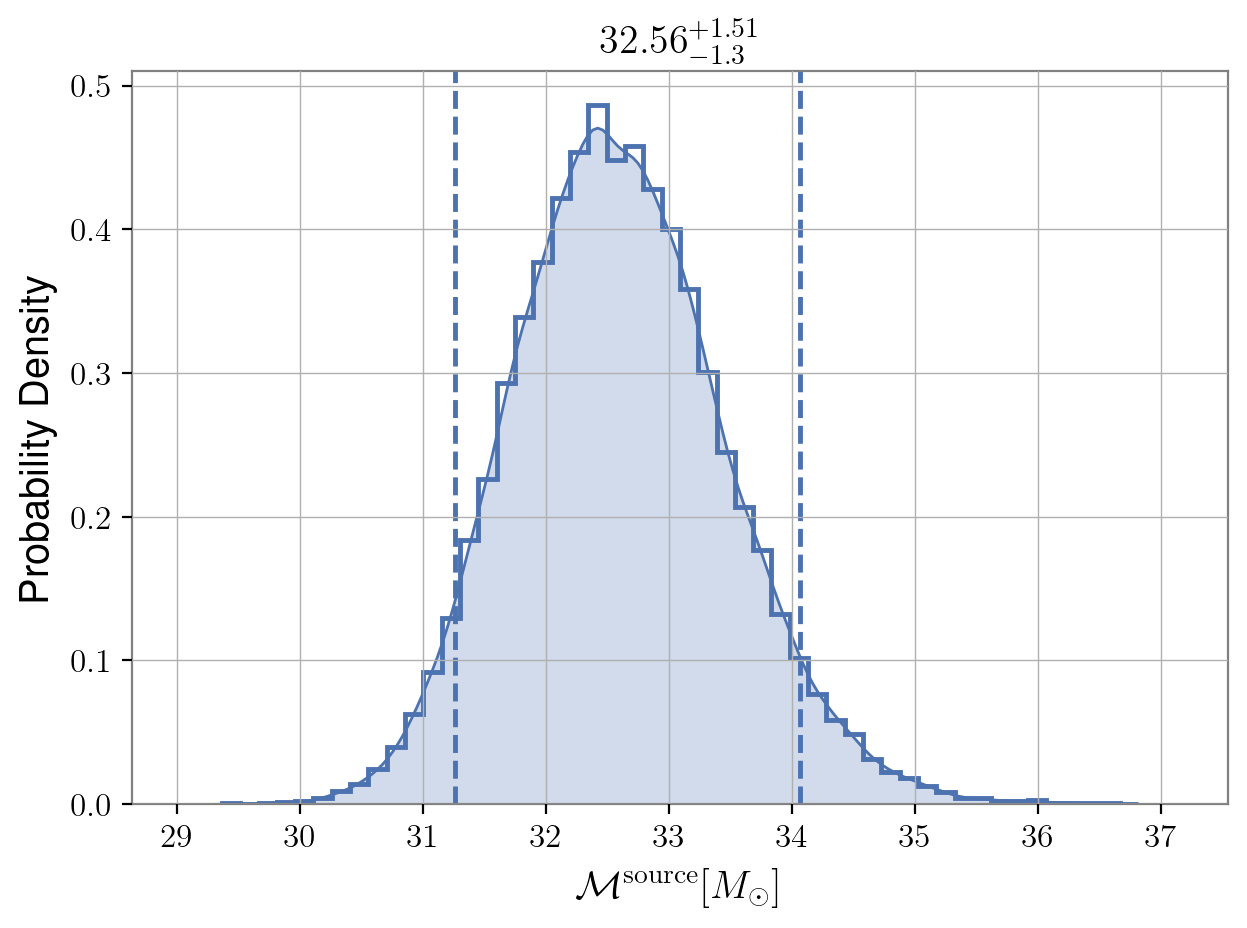

In [30]:
fig = posterior_samples.plot("chirp_mass_source", type="hist", kde=True)

We can also plot combinations of the posterior samples using a [corner plot](https://corner.readthedocs.io/en/latest/). These plots can be useful to spot degeneracies between parameters. Below we use `pesummary` to make a corner plot of four parameters.

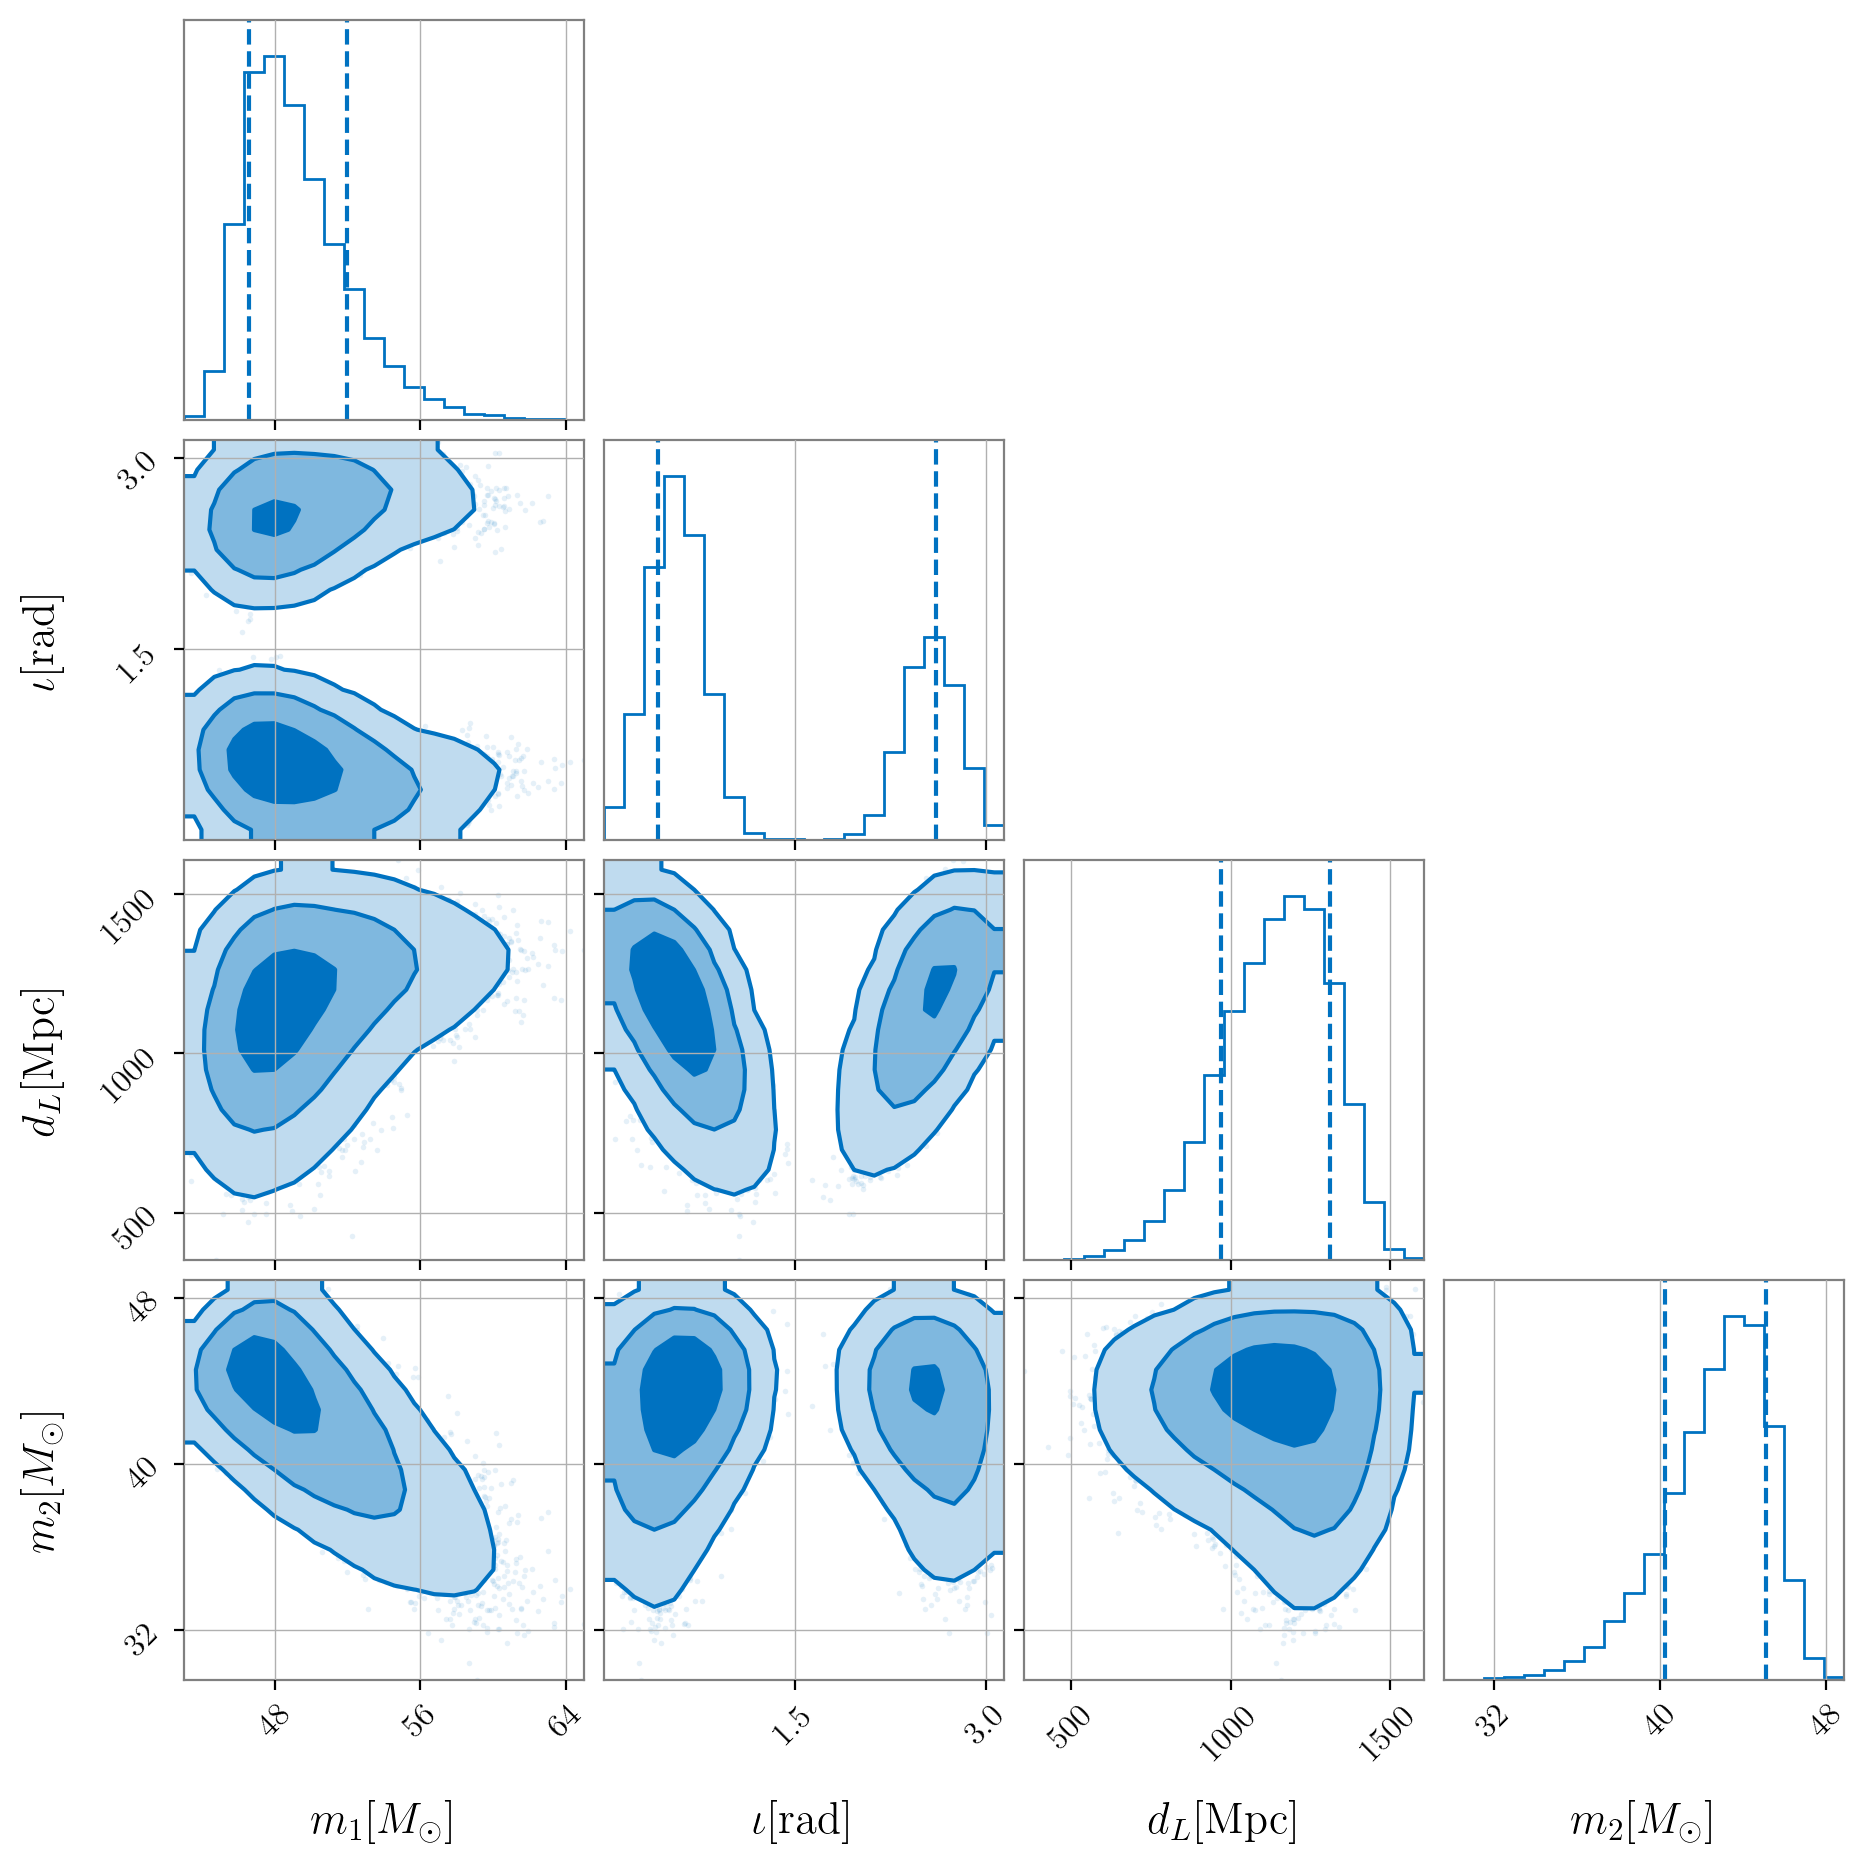

In [31]:
fig = posterior_samples.plot(type="corner",
                             parameters=["mass_1",
                                         "mass_2",
                                         "iota",
                                         "luminosity_distance"])

The spin posteriors can be represented as a spin disk plot. This shows the probable magnitude and direction of the spin vectors for each component black hole.

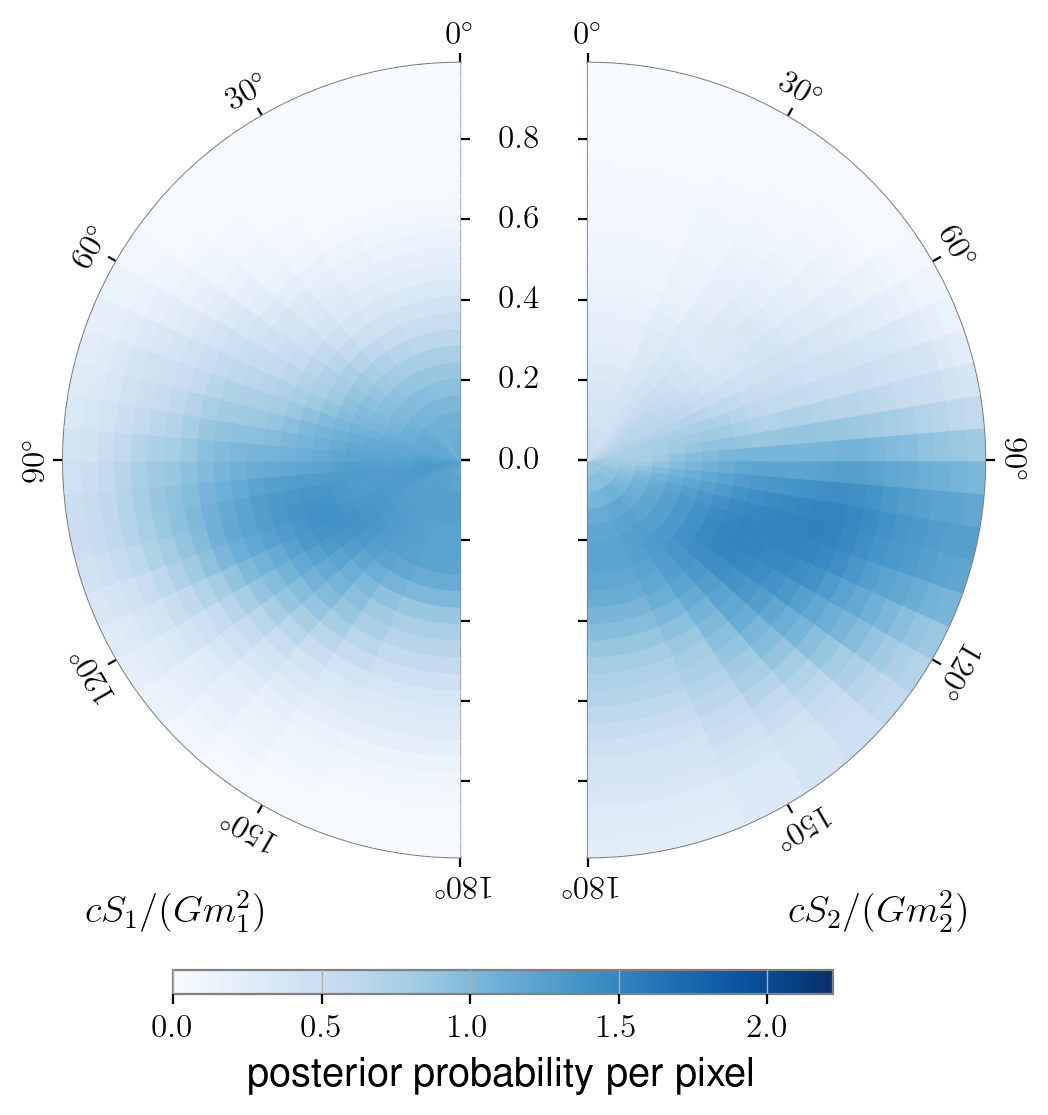

In [32]:
fig = posterior_samples.plot(type="spin_disk", colorbar=True, annotate=False,
                            show_label=True, cmap="Blues")

## Comparing multiple analyses

We can compare two or more sample sets. For example, we show below a comparison of the analyses performed for GW231226_101520, in this case both the four different waveforms `IMRPhenomXPHM`, `SEOBNRv5PHM`, `IMRPhenomXO4a`, and `NRSur7dq4`. First we can consider how the  waveforms compare on sampling the Chirp Mass of GW231226_101520 using a simple histogram

/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/cvmfs/software.igwn.org/conda/envs/igwn/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


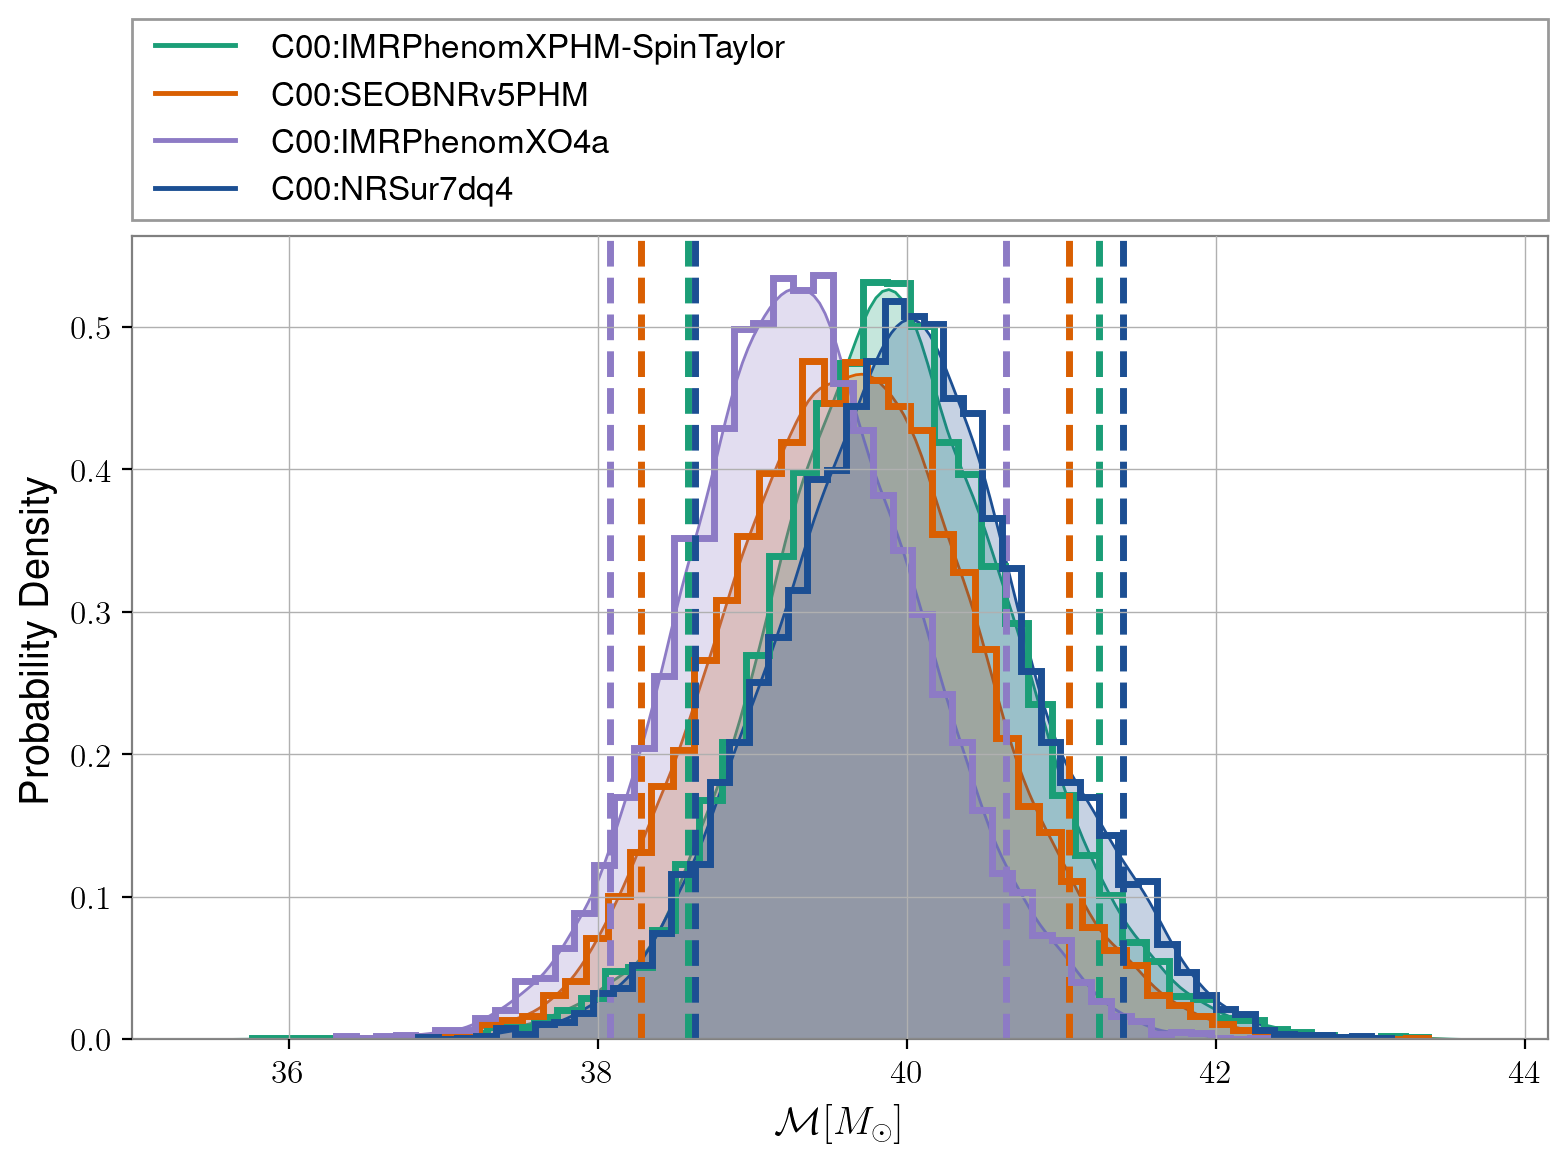

In [33]:
# select color scheme
color_palette = ["#1b9e77", "#d95f02", "#8D7BC5", "#1C4F93"]

compared_analyses = ["C00:IMRPhenomXPHM-SpinTaylor", "C00:SEOBNRv5PHM", "C00:IMRPhenomXO4a", "C00:NRSur7dq4"]
fig = samples_dict.plot("chirp_mass",
                        type="hist",
                        kde=True,
                        labels=compared_analyses,
                        colors=color_palette)

To compare more than two parameters, we can use a comparison corner plot:

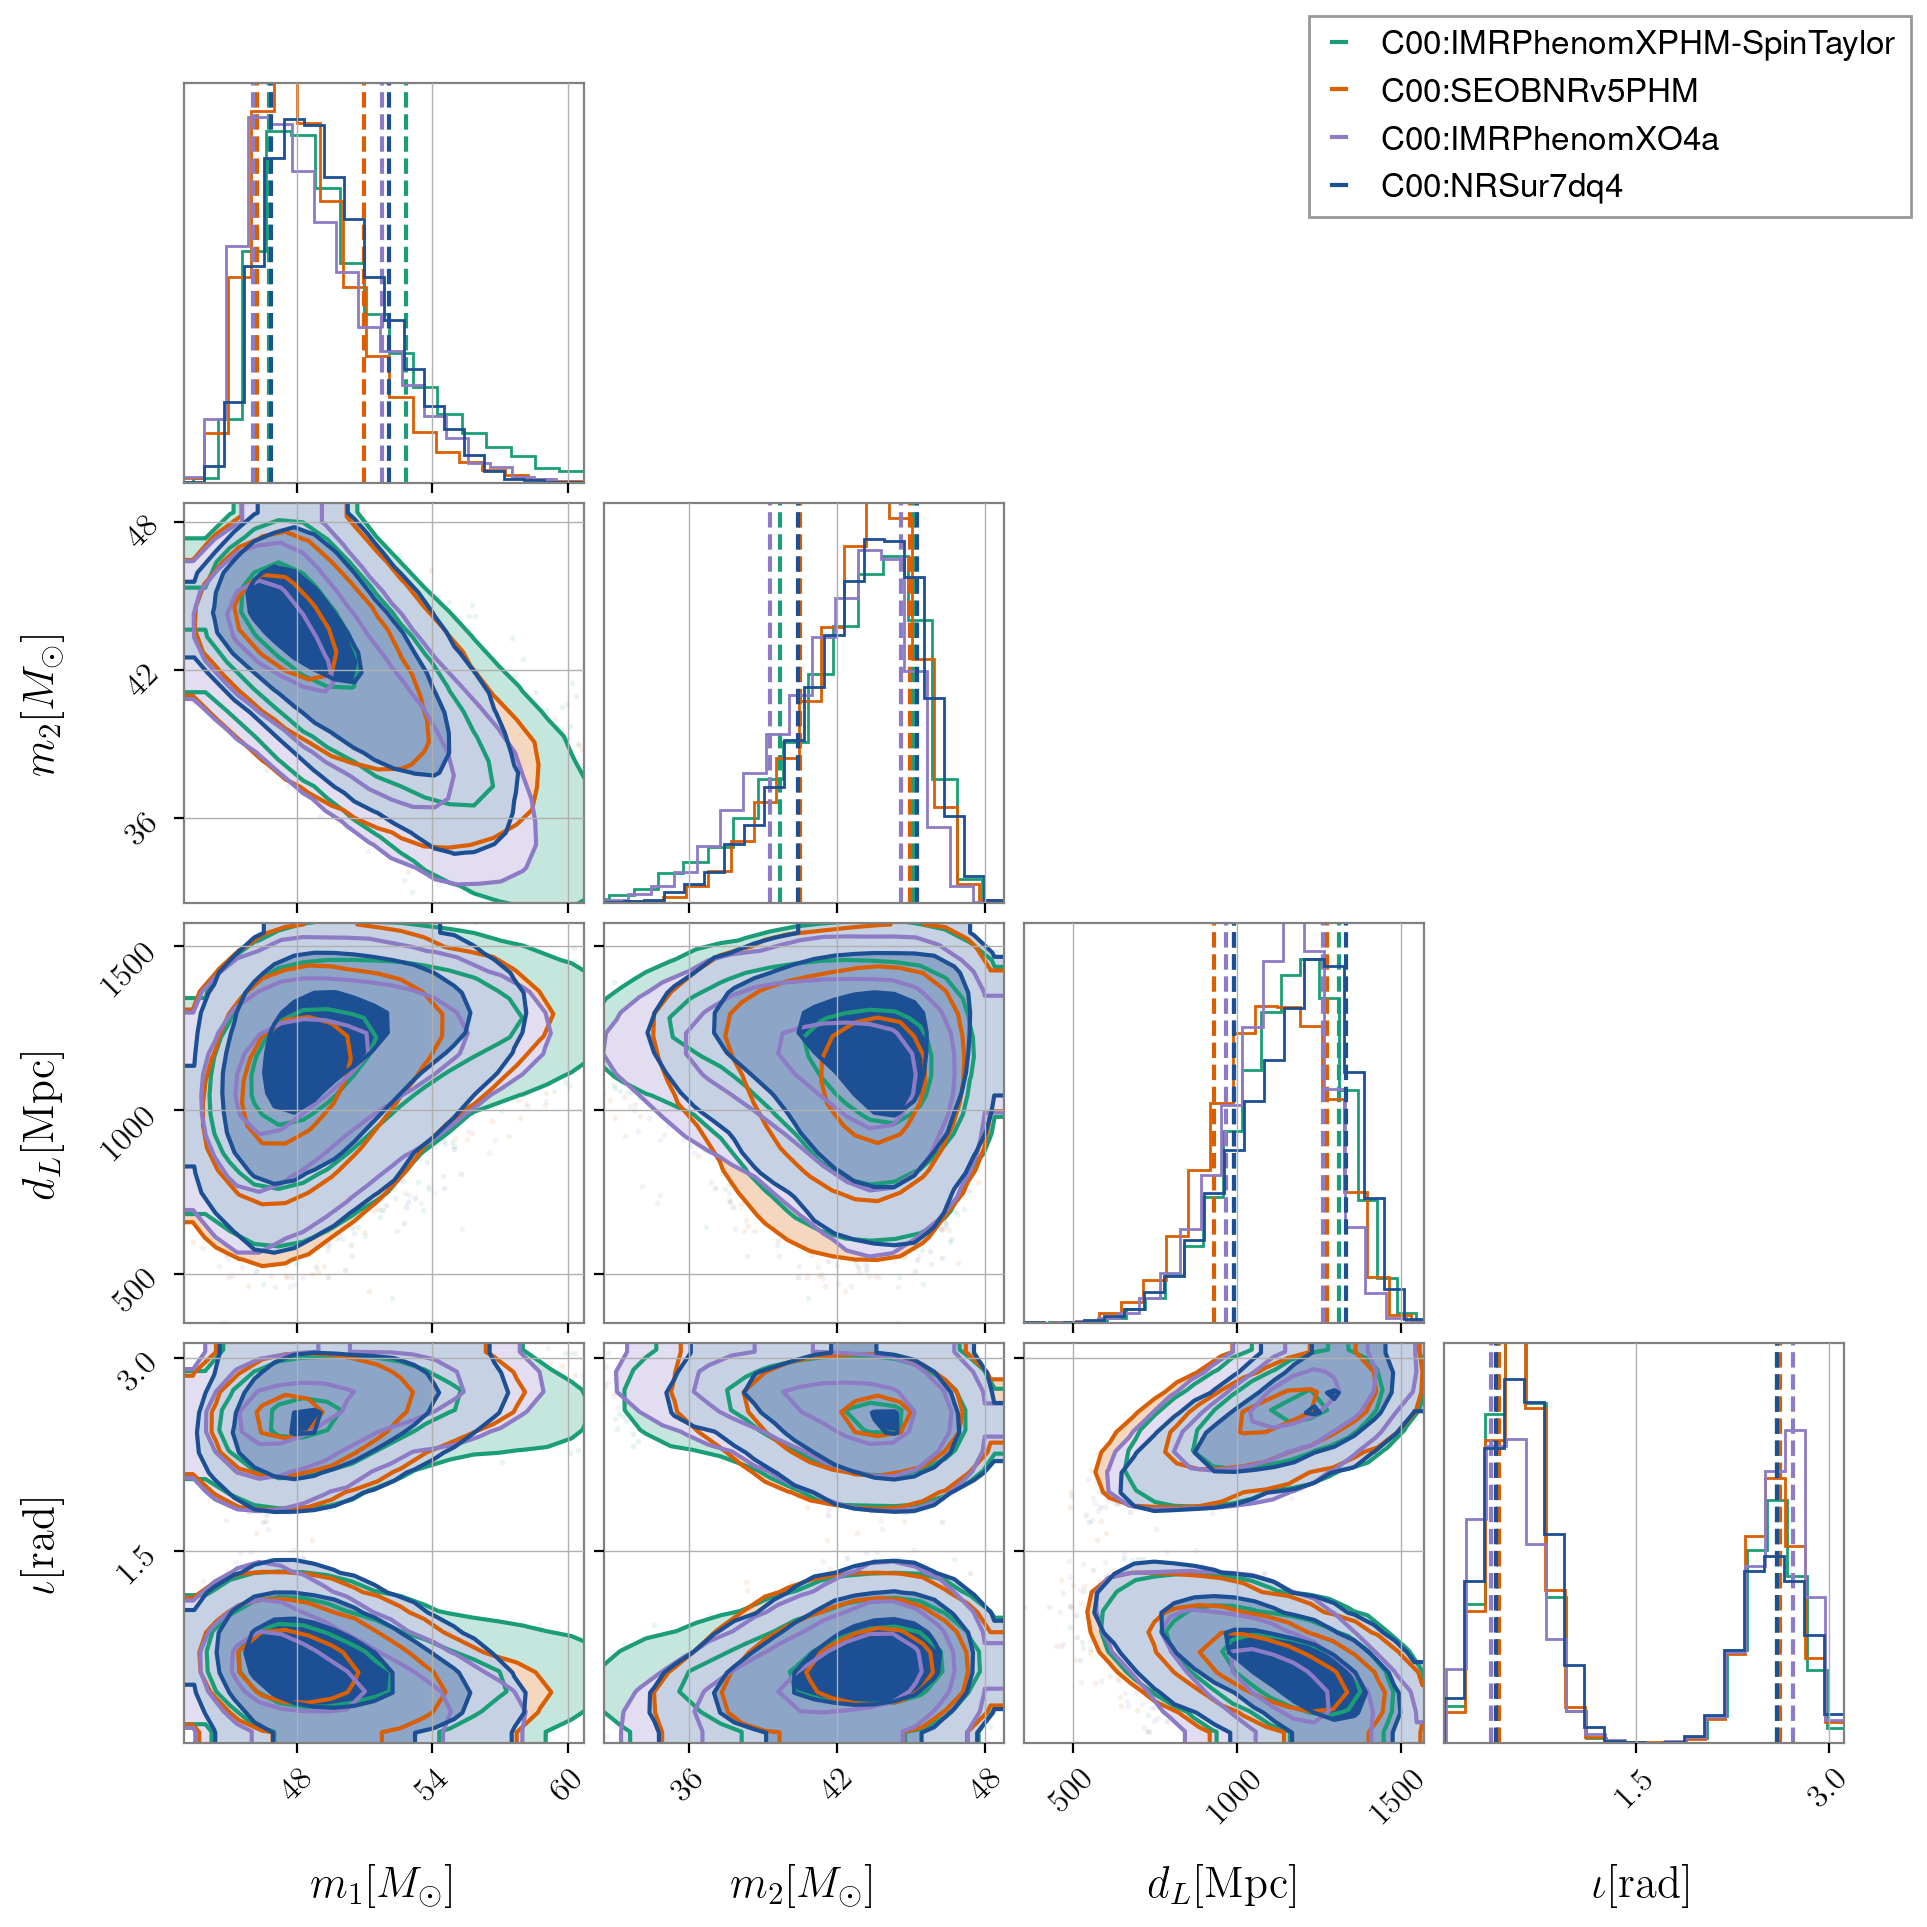

In [34]:
fig = samples_dict.plot(type="corner", 
                        parameters=["mass_1",
                                    "mass_2",
                                    "luminosity_distance",
                                    "iota"],
                        labels=compared_analyses,
                        colors=color_palette)

## Power Spectral Density (PSD)

The parameter estimation files also store the Power-Spectral-Density (PSD) that was used for each analysis. The PSD represents the noise of the detector at the time of the gravitational wave event. The plot below shows the PSD for the interferometers used for this analysis. In this plot the detectors are represented in the following way:
- H1: LIGO-Hanford
- L1: LIGO-Livingston

(1e-48, 1e-40)

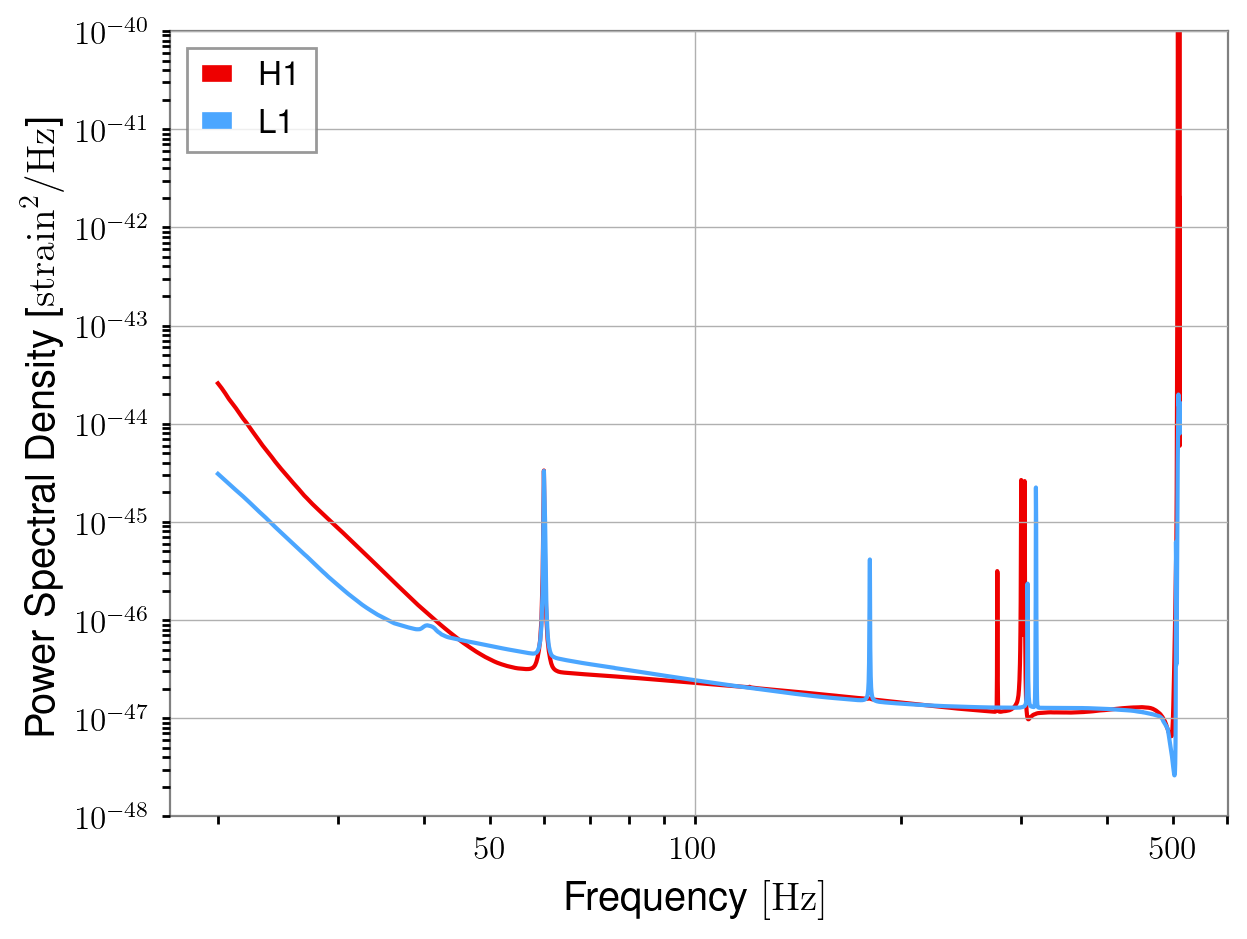

In [35]:
psd = data.psd["C00:IMRPhenomXPHM-SpinTaylor"]
fig = psd.plot(fmin=20)
ax = fig.gca()
ax.set_ylim(1e-48, 1e-40)

## Skymaps 

The sky location of the event can be shown directly from the pesummary metafile. This will produce a map of the sky with contours showing the specified credible intervals for the position of the event. 

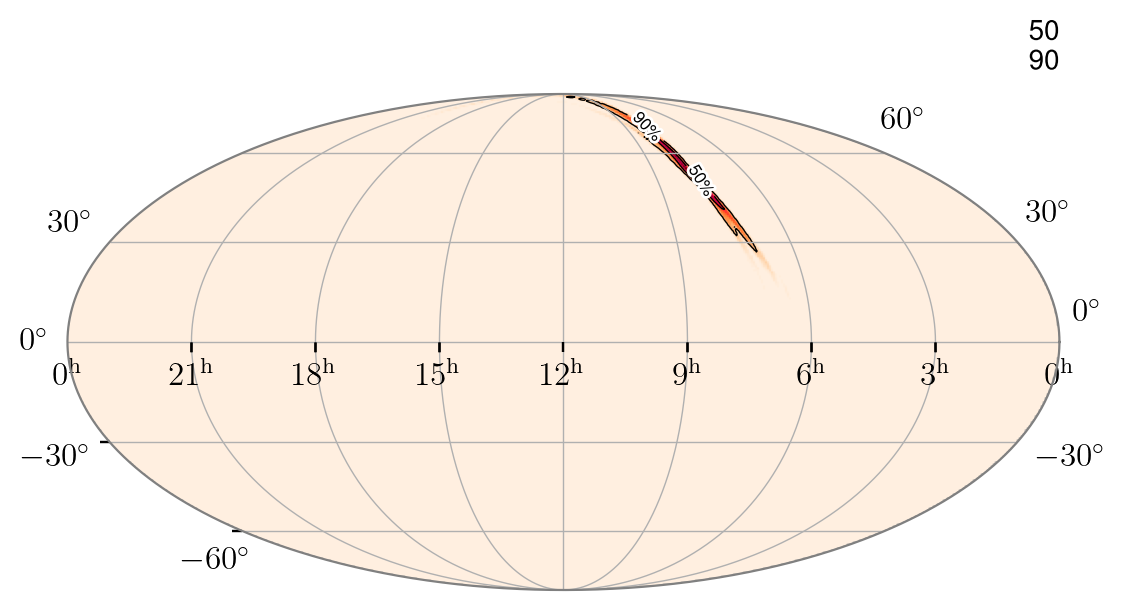

In [36]:
fig = data.skymap["C00:IMRPhenomXPHM-SpinTaylor"].plot(contour=[50, 90])

## Waveforms

Here we will generate the expected waveform from the sample sets. This allows us to see how the signal appears in the detector. We can generate the waveform from a specific sample using `.td_wavefrom` and the index of the sample you are interested in. This returns a dictionary containing two [`gwpy.timeseries.TimeSeries`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries/) of the plus and cross polarizations of the gravitational wave in the time domain

In [37]:
approximant = "SEOBNRv5PHM"
index = 100
delta_t = 1. / 4096
f_low = 10.
waveforms = samples_dict[f"C00:{approximant}"].td_waveform(approximant, delta_t, f_low, f_ref=f_low, ind=index)

Alternatively, we can use PESummary's [`.maxL_td_waveform`](https://lscsoft.docs.ligo.org/pesummary/stable_docs/gw/tutorials/waveforms.html?highlight=maxl_td_waveform) method to produce the waveform from the sample with the largest likelihood. 

In [38]:
Nsamples = samples_dict[f"C00:{approximant}"].number_of_samples
#samples_dict[f"C01:{approximant}"]["geocent_time"] = samples_dict[f"C01:IMRPhenomXPHM"].maxL["geocent_time"][0] * np.ones(Nsamples)

In [39]:
waveforms = samples_dict[f"C00:{approximant}"].maxL_td_waveform(approximant, delta_t, f_low, f_ref=f_low)

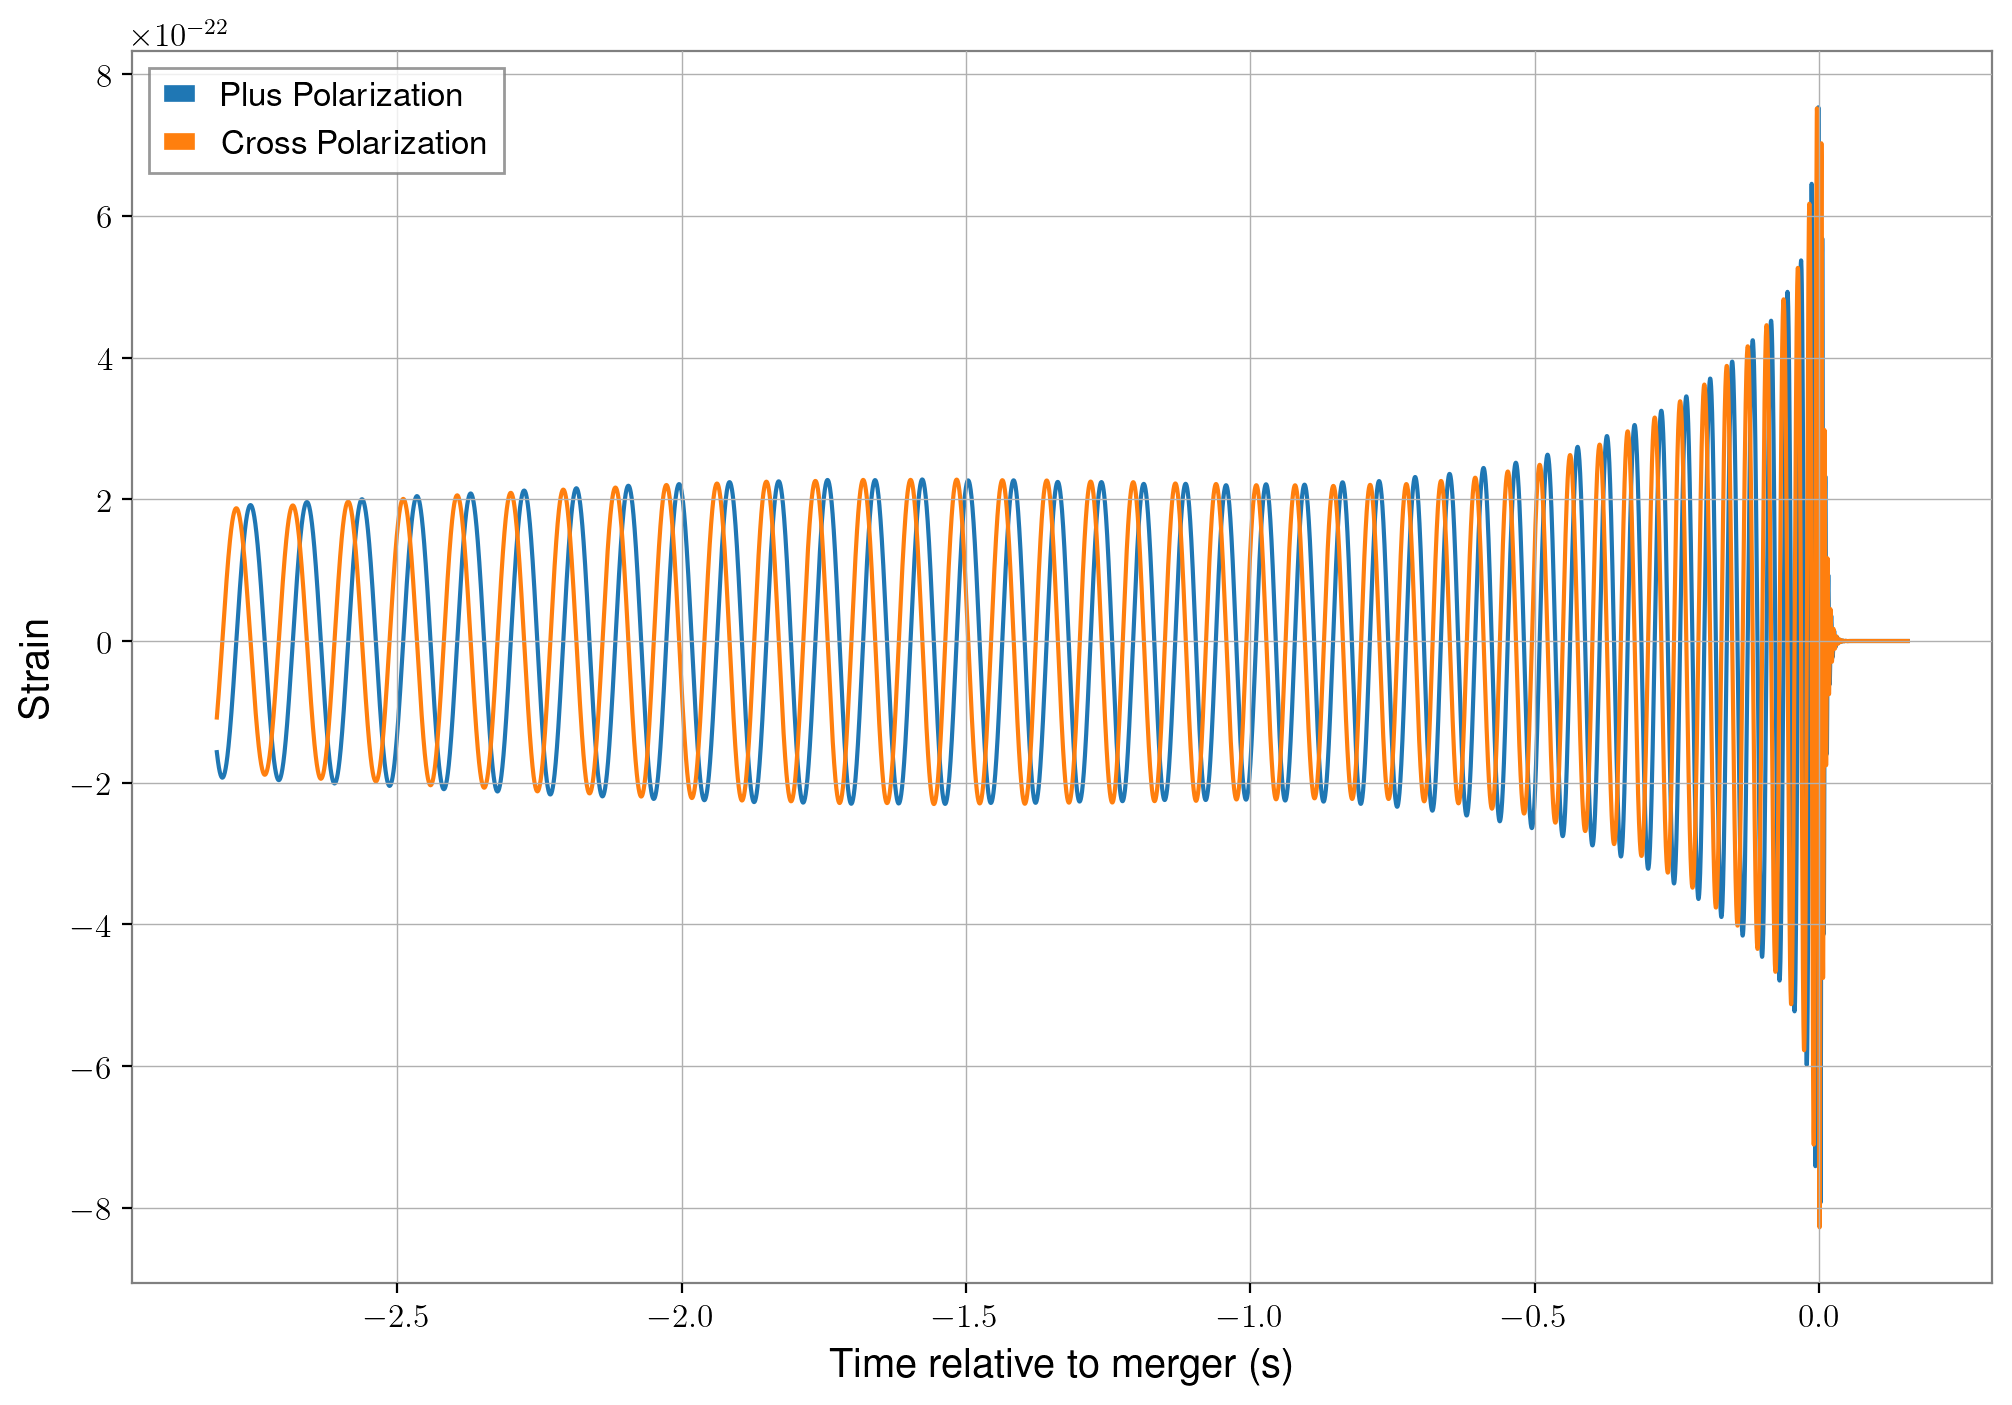

In [40]:
fig = plt.figure(figsize=(12,8))
plt.plot(waveforms["h_plus"].times, waveforms["h_plus"], label="Plus Polarization")
plt.plot(waveforms["h_cross"].times, waveforms["h_cross"], label="Cross Polarization")
plt.xlabel("Time relative to merger (s)")
plt.ylabel("Strain")
plt.legend()
plt.show()
plt.close()

We can then project these into specific detectors to observe how they appear in the strain data. This utilises the antenna response function of the requested detector. 

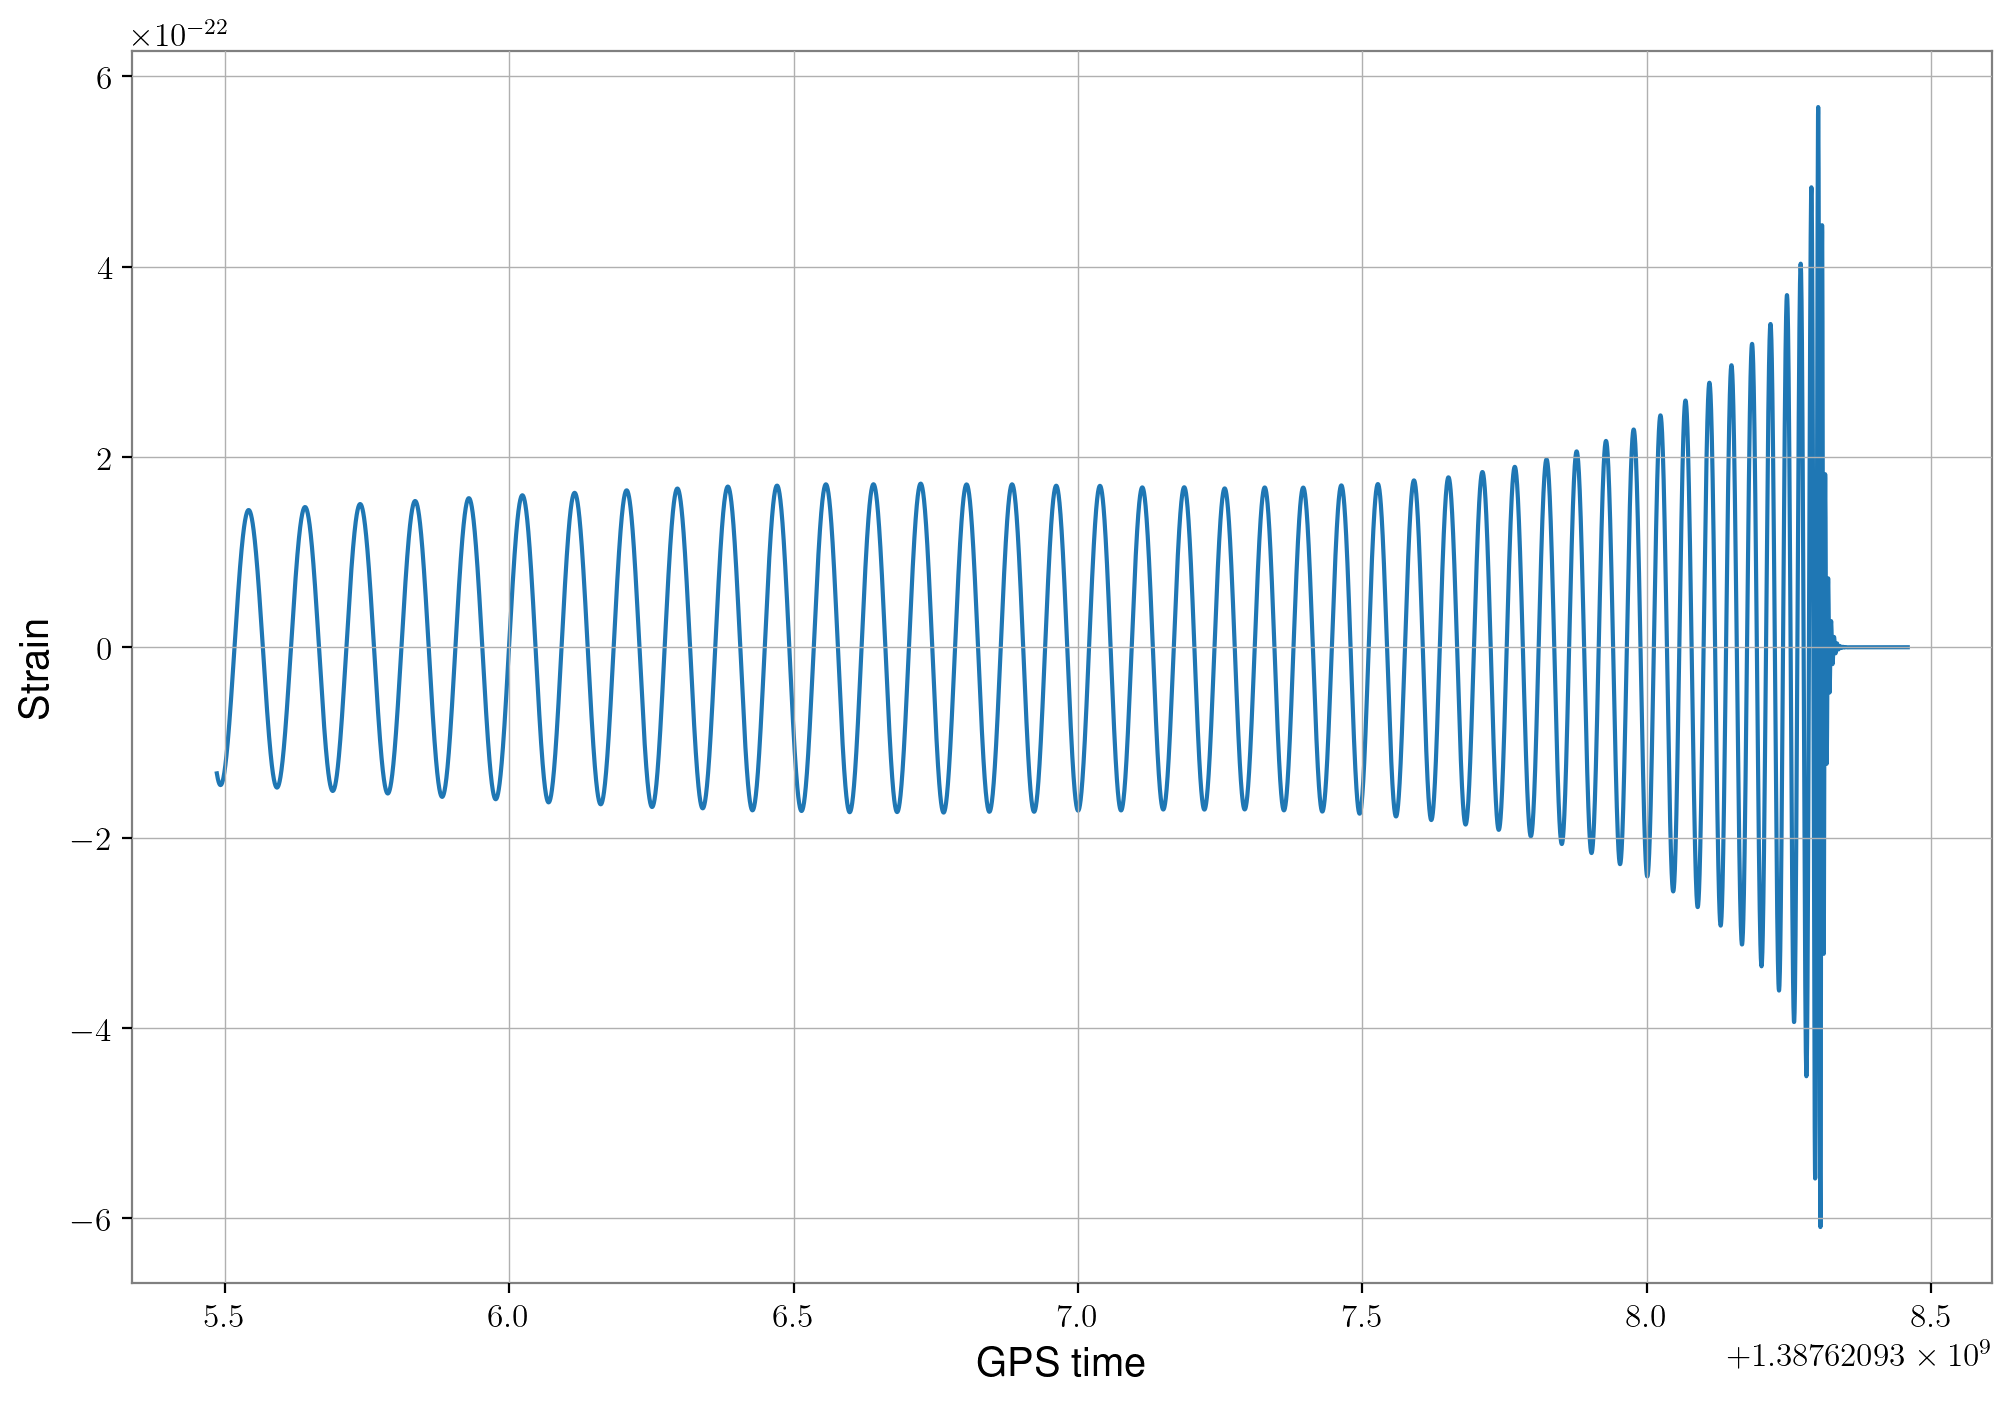

In [41]:
maxL_projected_waveform = samples_dict[f"C00:{approximant}"].maxL_td_waveform(approximant, delta_t, f_low, f_ref=f_low, project="L1")
fig = plt.figure(figsize=(12,8))
plt.plot(maxL_projected_waveform.times, maxL_projected_waveform)
plt.xlabel("GPS time")
plt.ylabel("Strain")
plt.show()
plt.close()

The times shown above are given in the GPS time format as standard across LVK results. GPS time is defined as the number of seconds that have elapsed since midnight (00:00 UTC) on January 6th 1980. There are several methods to convert this to a human readable time; GWOSC provides a [GPS time converter](https://www.gw-openscience.org/gps/) you can use to translate into datetime, alternatively there are several Python routines including [`gwpy.time`](https://gwpy.github.io/docs/stable/time/).

In [42]:
import gwpy
merger_time = samples_dict["C00:IMRPhenomXPHM-SpinTaylor"].maxL["geocent_time"]
merger_time_UTC = gwpy.time.from_gps(merger_time).strftime("%H:%M:%S %d/%m/%Y")
print(merger_time_UTC)

'10:15:20 26/12/2023'